### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Nota: 4.4

           WATER PROTEIN  FAT LACTOSE  ASH
HORSE       90.1     2.6  1.0     6.9 0.35
ORANGUTAN   88.5     1.4  3.5     6.0 0.24
MONKEY      88.4     2.2  2.7     6.4 0.18
DONKEY      90.3     1.7  1.4     6.2 0.40
HIPPO       90.4     0.6  4.5     4.4 0.10
CAMEL       87.7     3.5  3.4     4.8 0.71
BISON       86.9     4.8  1.7     5.7 0.90
BUFFALO     82.1     5.9  7.9     4.7 0.78
GUINEA_PIG  81.9     7.4  7.2     2.7 0.85
CAT         81.6    10.1  6.3     4.4 0.75
FOX         81.6     6.6  5.9     4.9 0.93
LLAMA       86.5     3.9  3.2     5.6 0.80
MULE        90.0     2.0  1.8     5.5 0.47
PIG         82.8     7.1  5.1     3.7 1.10
ZEBRA       86.2     3.0  4.8     5.3 0.70
SHEEP       82.0     5.6  6.4     4.7 0.91
DOG         76.3     9.3  9.5     3.0 1.20
ELEPHANT    70.7     3.6 17.6     5.6 0.63
RABBIT      71.3    12.3 13.1     1.9 2.30
RAT         72.5     9.2 12.6     3.3 1.40
DEER        65.9    10.4 19.7     2.6 1.40
REINDEER    64.8    10.7 20.3     2.5 1.40
WHALE      

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

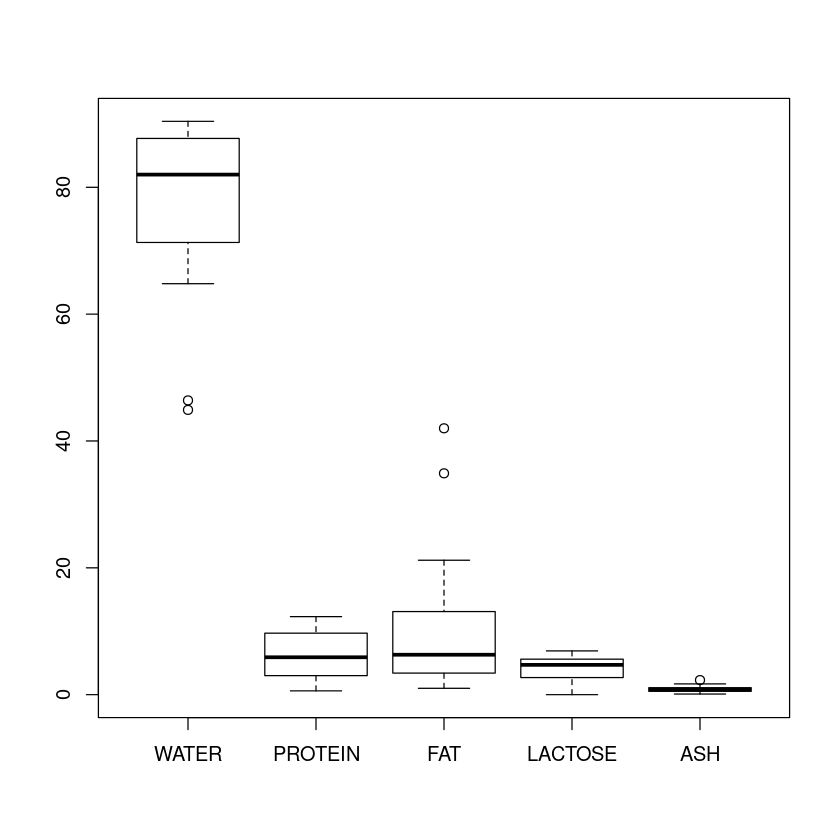

In [1]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
print(datos)
summary(datos)
boxplot(datos)

**Ejercicio 1:** describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

* En primera instancia no se puede ver alguna relación directa u orden de importancia en los datos 
* Al ser muchas variables no se puede generalizar y hacer algún tipo de rango o agrupamiento
* Es pertinente, porque no se puede ver facilmente mayor información sobre caracteristicas propias de los mamíferos

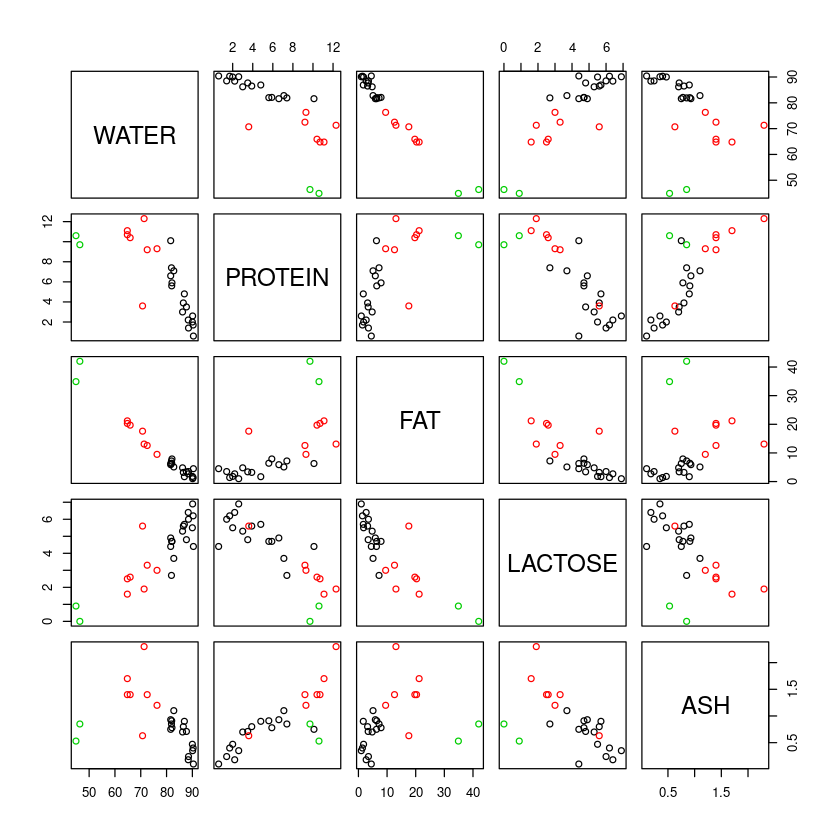

In [2]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

**Ejercicio 2:** Interprete y comente los resultados obtenidos. 
 Observando las filas y columnas por grupos de a pares de variables se puede deducir lo siguiente:
* En la primera fila y segunda columna: los **puntos rojos** representan una alta concentración de agua y baja en proteína. Mientras que los **puntos verdes** se puede decir que tienen una concentración media o equilibrada de estas variables. Por su parte el conjunto de **puntos negros** representa una alta concentración de proteinas y baja en agua.

* En la tercera fila y cuarta columna: los **puntos rojos** representan que existe una media-baja concentración de proteina y grasa.Los **puntos verdes** una alta concentración de proteína y grasa. Y finalmente los **puntos negros** representan una alta concentración de grasa y alta en proteína.

Y así sucesivamente se puede interpretar por pares de variables.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
2,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
3,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957


K-means clustering with 3 clusters of sizes 16, 7, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 86.06250  4.275000  4.17500 5.118750 0.635625
2 69.47143  9.514286 16.28571 2.928571 1.432857
3 45.65000 10.150000 38.45000 0.450000 0.690000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          2          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          3          3 

Within cluster sum of squares by cluster:
[1] 377.2215 299.9911  27.1912
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

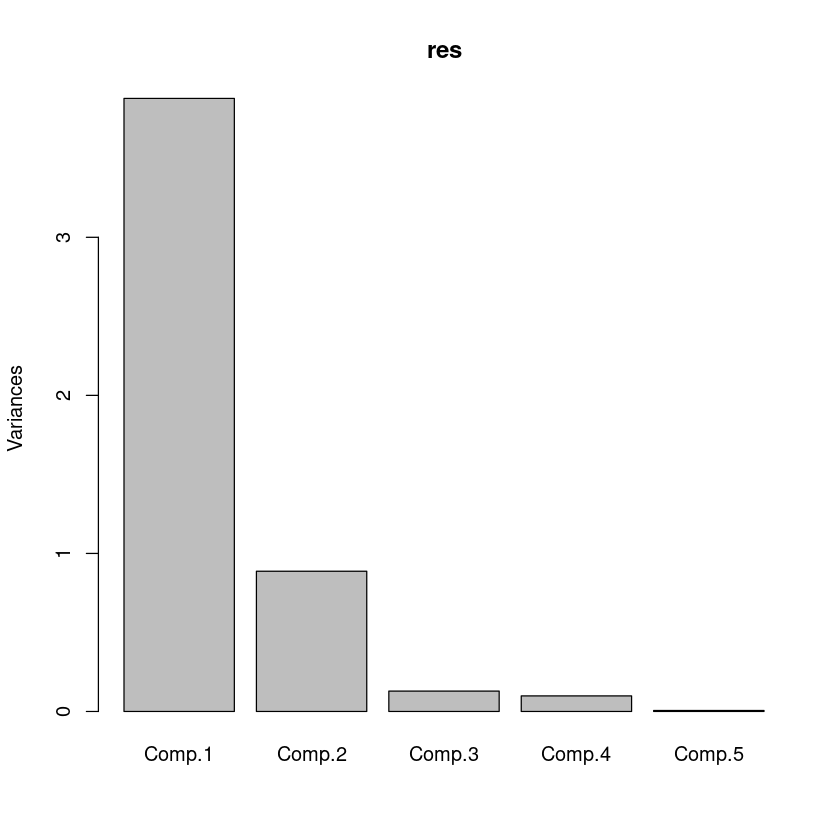

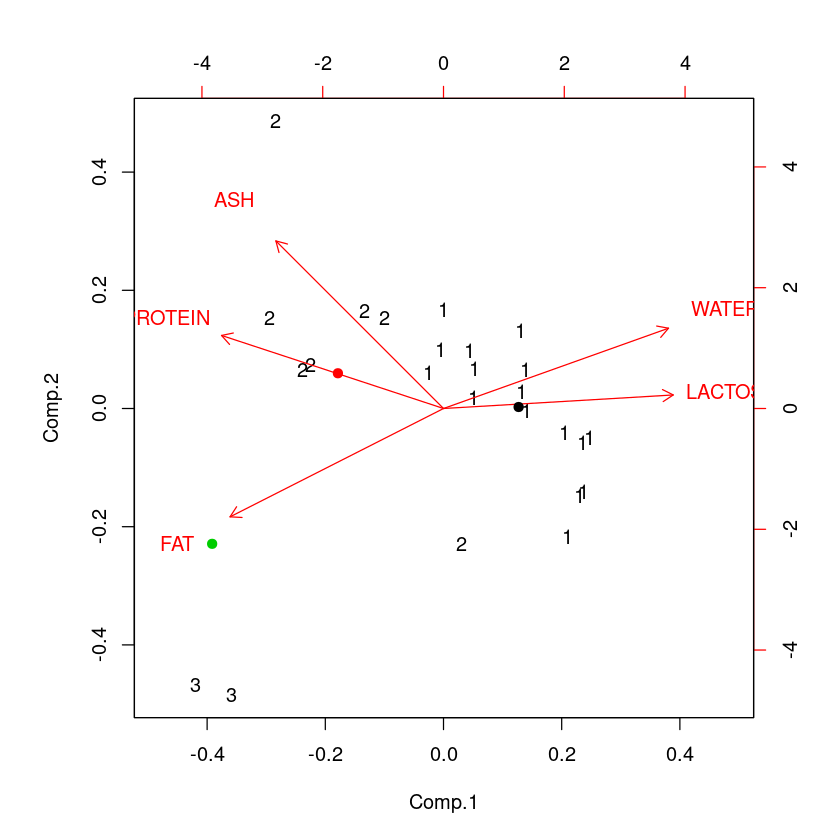

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


**Ejercicio 3:** Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

## Para dos grupos:

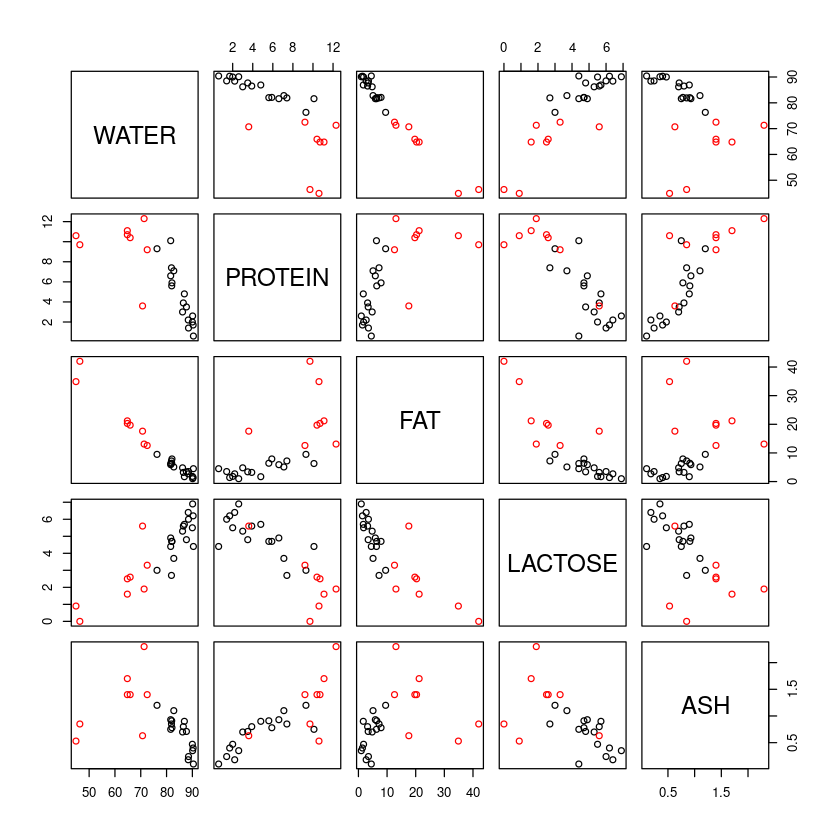

In [4]:
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003
2,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632


K-means clustering with 2 clusters of sizes 17, 8

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 85.48824 4.570588  4.488235 4.994118 0.6688235
2 62.66250 9.700000 22.675000 2.300000 1.2762500

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2 

Within cluster sum of squares by cluster:
[1]  521.8994 1664.9235
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

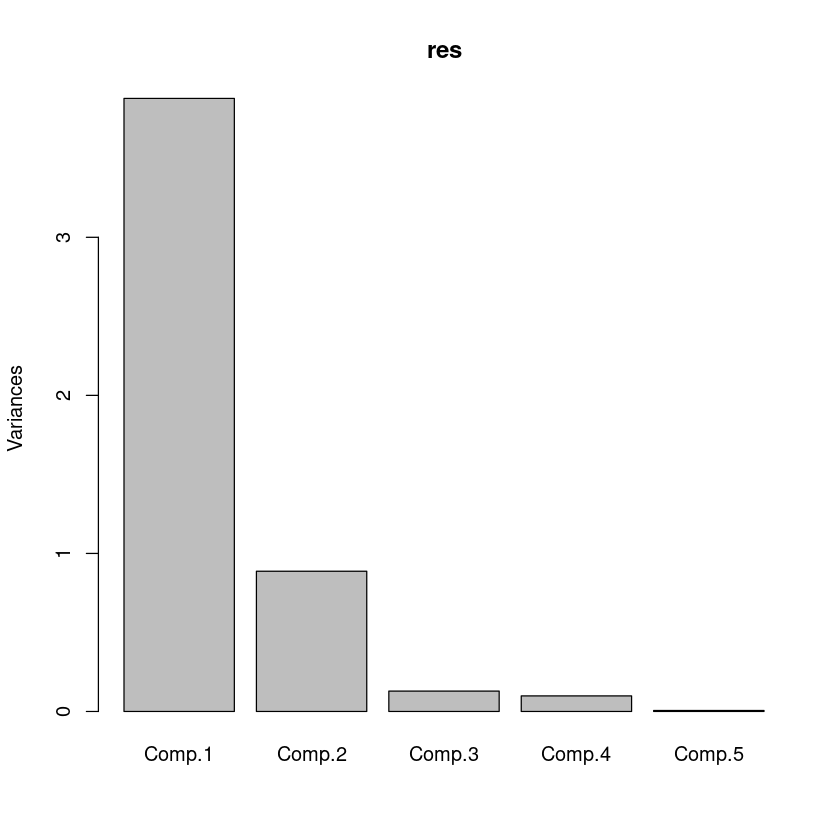

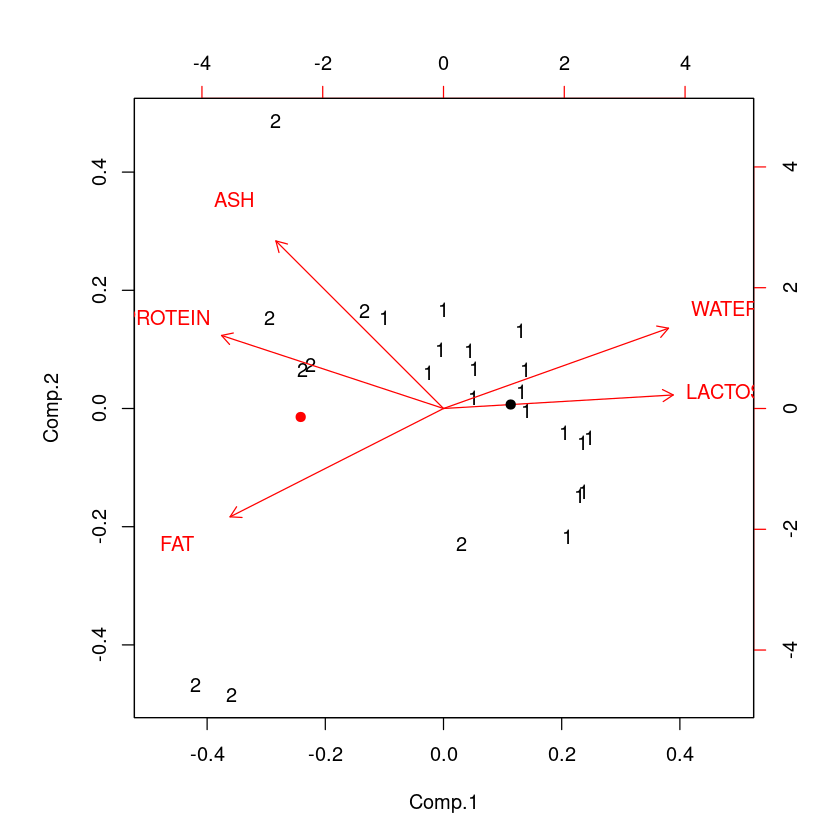

In [5]:
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

## Para 4 grupos


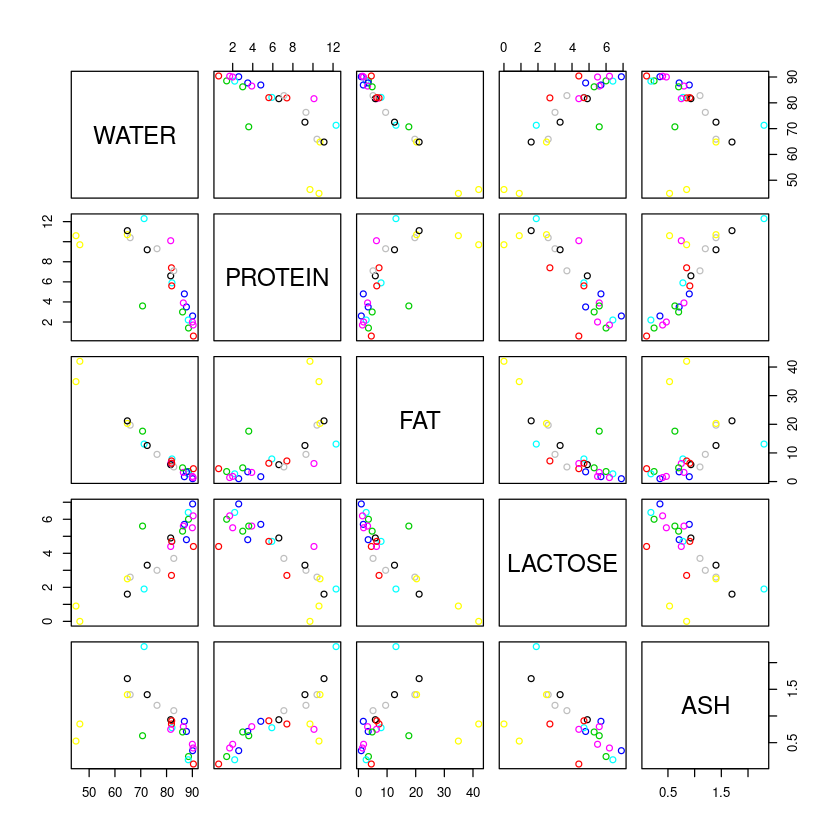

In [6]:
k0=24
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-2.892787e+00,0.72112072,-0.05594256,0.27617203,0.054319487
2,5.131204e-01,0.32136461,-0.07894264,0.02017106,-0.035616018
3,1.390928e+00,-0.01265979,-0.11692864,0.28707863,-0.004502066
4,2.435175e+00,-0.23147753,-0.33015028,-0.30766379,0.048184402
5,5.050683e-01,0.08823533,-0.00838298,-0.13377446,0.083805910
6,1.364034e+00,0.30922416,-0.22859668,0.08824157,-0.024344692
7,-2.345616e+00,0.31000268,-0.20568573,-0.10860492,0.031051371
8,-9.828286e-01,0.72523875,0.33155190,-0.16959000,-0.063456145
9,4.290170e-01,0.45931152,-0.13518144,-0.23694089,-0.024309349
10,2.060294e+00,-1.01919913,0.76243569,0.51009117,0.029381555


K-means clustering with 24 clusters of sizes 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Cluster means:
   WATER PROTEIN  FAT LACTOSE   ASH
1  64.80   11.10 21.2    1.60 1.700
2  82.00    5.60  6.4    4.70 0.910
3  86.20    3.00  4.8    5.30 0.700
4  90.10    2.60  1.0    6.90 0.350
5  82.10    5.90  7.9    4.70 0.780
6  86.50    3.90  3.2    5.60 0.800
7  64.80   10.70 20.3    2.50 1.400
8  76.30    9.30  9.5    3.00 1.200
9  81.60    6.60  5.9    4.90 0.930
10 90.40    0.60  4.5    4.40 0.100
11 70.70    3.60 17.6    5.60 0.630
12 86.90    4.80  1.7    5.70 0.900
13 88.40    2.20  2.7    6.40 0.180
14 90.15    1.85  1.6    5.85 0.435
15 46.40    9.70 42.0    0.00 0.850
16 82.80    7.10  5.1    3.70 1.100
17 72.50    9.20 12.6    3.30 1.400
18 81.90    7.40  7.2    2.70 0.850
19 88.50    1.40  3.5    6.00 0.240
20 87.70    3.50  3.4    4.80 0.710
21 71.30   12.30 13.1    1.90 2.300
22 81.60   10.10  6.3    4.40 0.750
23 44.90   10.60 34.9    0.90 0.530
24 6

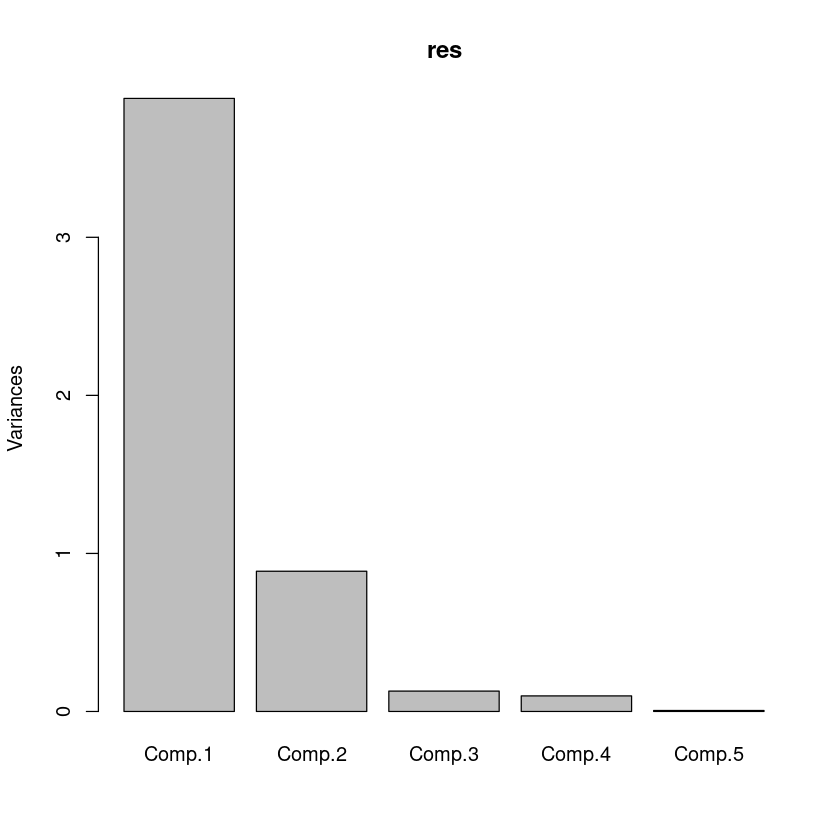

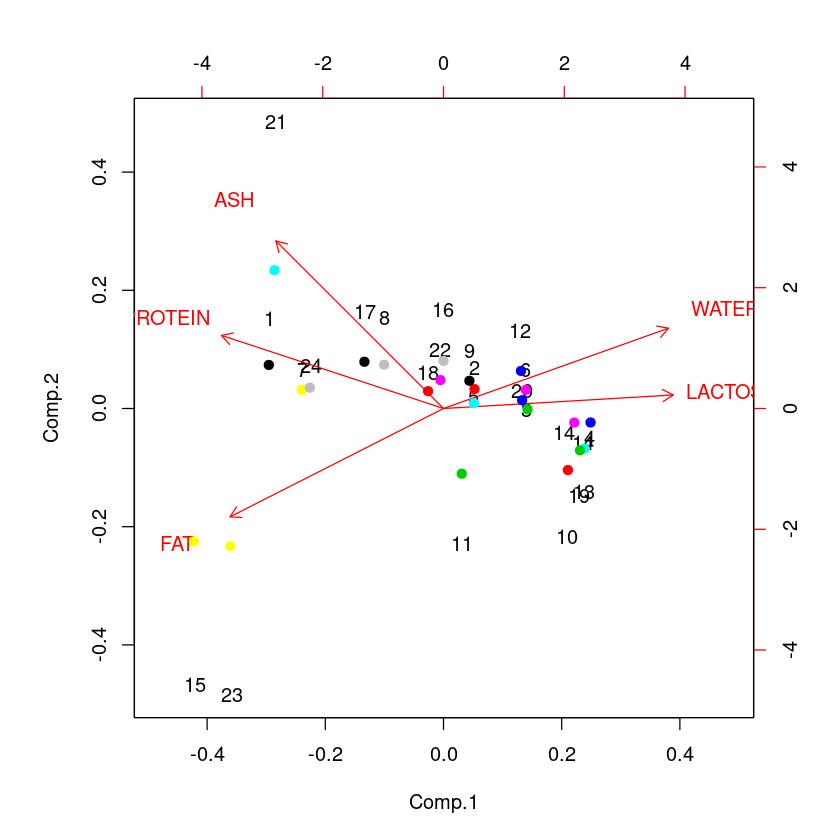

In [7]:
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

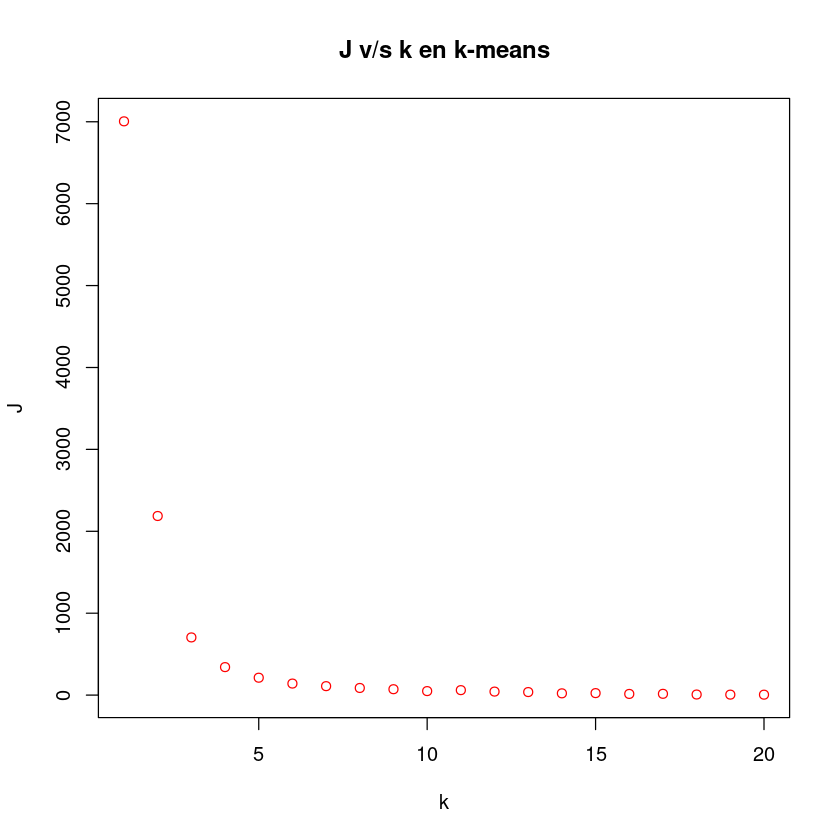

In [8]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

**Ejercicio 4:** de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.



In [9]:
J<-rep(0,20)
fin_iter<-20
dif_k = 0
dif_k1=0
tasa_k = 0
comp=0
k_optimo = 0

for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
     J[k]<-cl$tot.withinss
    if(k!=1 && k!=20){
        dif_k = abs(J[k]-J[k-1])
        dif_k1 = J[k]-J[k+1]
        tasa_k = dif_k/dif_k1




    }
    if(tasa_k > comp ){
        comp = tasa_k
         k_optimo = k+1
    }

}

print(k_optimo)

[1] 3


**El número óptimo de grupos es K=3**

**Ejercicio 5:** Realice un análisis de clustering con el conjunto de datos iris.csv. Considere para ello las cuatro características numéricas que se proporcionan. Luego realice un análisis respecto a la etiqueta de cada observación. 
Interprete sus resultados. 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




    sepal.length sepal.width petal.length petal.width    variety
1            5,1         3,5          1,4         0,2     Setosa
2            4,9         3,0          1,4         0,2     Setosa
3            4,7         3,2          1,3         0,2     Setosa
4            4,6         3,1          1,5         0,2     Setosa
5            5,0         3,6          1,4         0,2     Setosa
6            5,4         3,9          1,7         0,4     Setosa
7            4,6         3,4          1,4         0,3     Setosa
8            5,0         3,4          1,5         0,2     Setosa
9            4,4         2,9          1,4         0,2     Setosa
10           4,9         3,1          1,5         0,1     Setosa
11           5,4         3,7          1,5         0,2     Setosa
12           4,8         3,4          1,6         0,2     Setosa
13           4,8         3,0          1,4         0,1     Setosa
14           4,3         3,0          1,1         0,1     Setosa
15           5,8         

  sepal.length    sepal.width     petal.length    petal.width    
 Min.   : 1.00   Min.   : 1.00   Min.   : 1.00   Min.   : 1.000  
 1st Qu.: 9.00   1st Qu.: 8.00   1st Qu.: 7.00   1st Qu.: 3.000  
 Median :16.00   Median :10.00   Median :20.50   Median :10.000  
 Mean   :16.39   Mean   :10.57   Mean   :19.19   Mean   : 9.993  
 3rd Qu.:22.00   3rd Qu.:13.00   3rd Qu.:28.00   3rd Qu.:15.000  
 Max.   :35.00   Max.   :23.00   Max.   :43.00   Max.   :22.000  
       variety  
 Setosa    :50  
 Versicolor:50  
 Virginica :50  
                
                
                

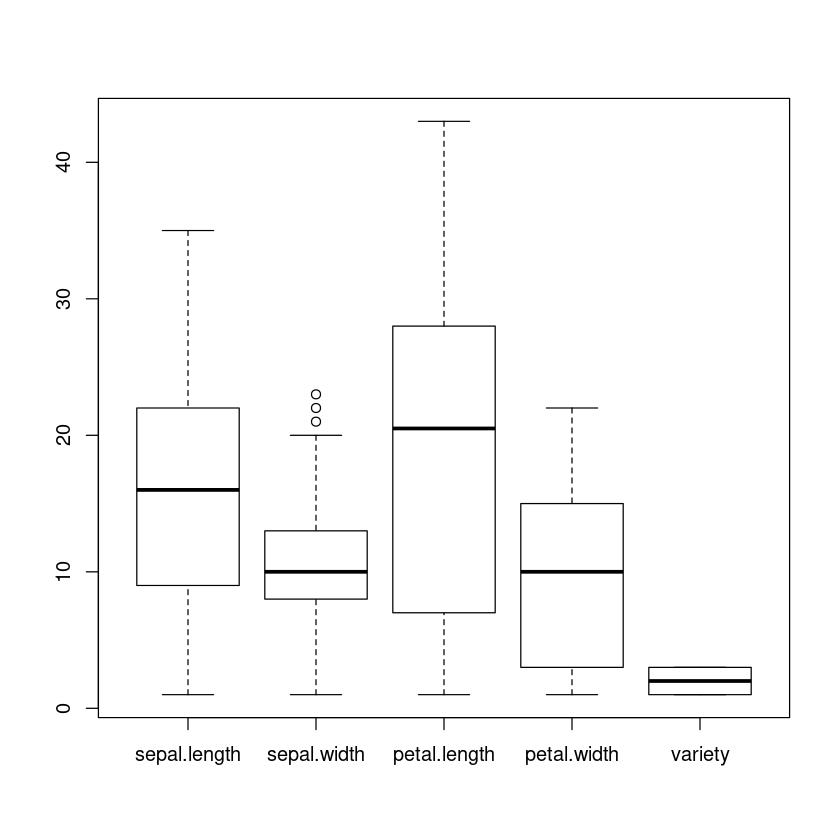

In [10]:
library(cluster)
library(ggplot2)
library(readr)
library(dplyr)
#ruta datos

datos2 <-read.table("iris.csv", sep=";",header = TRUE)
print(datos2)
datos2$sepal.length <-as.numeric(datos2$sepal.length)
datos2$sepal.width <- as.numeric(datos2$sepal.width)
datos2$petal.width <- as.numeric(datos2$petal.width)
datos2$petal.length <- as.numeric(datos2$petal.length)
datos2$variety <- as.factor(datos2$variety)
summary(datos2)
boxplot(datos2)

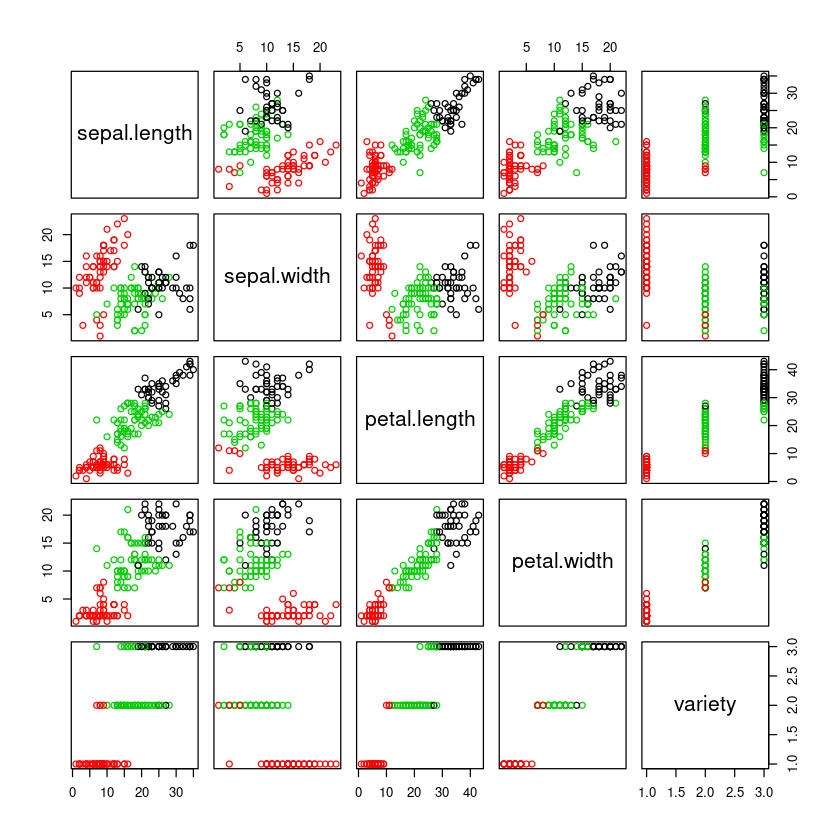

In [11]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos2[,-5],k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos2,col=cl$cluster)

In [12]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos2, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


ERROR: Error in cov.wt(z): 'x' must contain finite values only
